In [1]:
# from dotenv import load_dotenv


# load_dotenv()

In [2]:
import json

source_json_path = "/Users/oganes/citations/RAGTruth-main/dataset/source_info.jsonl"

source_info_data = []
with open(source_json_path, 'r') as json_file:
    for json_str in json_file:
        cur_data = json.loads(json_str)
        source_info_data.append(cur_data)


response_json_path = "/Users/oganes/citations/RAGTruth-main/dataset/response.jsonl"

response_data = []
with open(response_json_path, 'r') as json_file:
    for json_str in json_file:
        cur_data = json.loads(json_str)
        response_data.append(cur_data)

In [3]:
source_info_data[0].keys()

dict_keys(['source_id', 'task_type', 'source', 'source_info', 'prompt'])

In [4]:
marco_samples = [sample for sample in source_info_data if sample['source'] == 'MARCO']
len(marco_samples)

989

In [5]:
context_sample = marco_samples[1]
context_sample

{'source_id': '14293',
 'task_type': 'QA',
 'source': 'MARCO',
 'source_info': {'question': 'tips how to conserve water',
  'passages': 'passage 1:1 Take shorter showers. 2  Replace you showerhead with an ultra-low-flow version. 3  Some units are available that allow you to cut off the flow without adjusting the water temperature knobs. 4  Use the minimum amount of water needed for a bath by closing the drain first and filling the tub only 1/3 full.\n\npassage 2:Here are 20 water-saving tips to get you going…. 1. Shower Bucket. Instead of letting the water pour down the drain, stick a bucket under the faucet while you wait for your shower water to heat up. You can use the water for flushing the toilet or watering your plants. 2. Turn off the tap while brushing your teeth. Water comes out of the average faucet at 2.5 gallons per minute. Don’t let all that water go down the drain while you brush! Turn off the faucet after you wet your brush, and leave it off until it’s time to rinse. 3. 

In [6]:
len(context_sample["prompt"]), print(context_sample["prompt"])

Briefly answer the following question:
tips how to conserve water
Bear in mind that your response should be strictly based on the following three passages:
passage 1:1 Take shorter showers. 2  Replace you showerhead with an ultra-low-flow version. 3  Some units are available that allow you to cut off the flow without adjusting the water temperature knobs. 4  Use the minimum amount of water needed for a bath by closing the drain first and filling the tub only 1/3 full.

passage 2:Here are 20 water-saving tips to get you going…. 1. Shower Bucket. Instead of letting the water pour down the drain, stick a bucket under the faucet while you wait for your shower water to heat up. You can use the water for flushing the toilet or watering your plants. 2. Turn off the tap while brushing your teeth. Water comes out of the average faucet at 2.5 gallons per minute. Don’t let all that water go down the drain while you brush! Turn off the faucet after you wet your brush, and leave it off until it’s t

(1605, None)

In [7]:
prompts = [sample["prompt"] for sample in marco_samples]

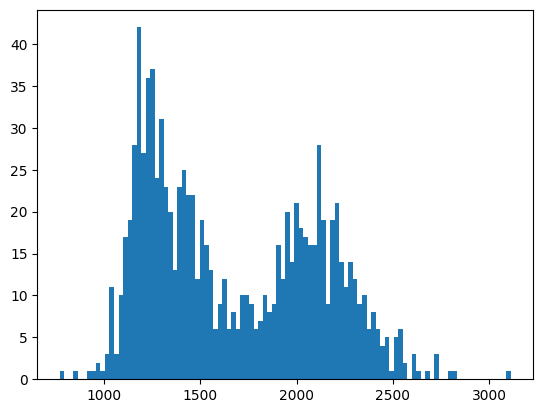

In [8]:
from matplotlib import pyplot as plt

plt.hist([len(prompt) for prompt in prompts], bins=100);

In [9]:
response_data[0].keys()

dict_keys(['id', 'source_id', 'model', 'temperature', 'labels', 'split', 'quality', 'response'])

In [10]:
responses = [sample for sample in response_data if sample['source_id'] == context_sample['source_id'] and sample["model"] == "llama-2-7b-chat"]
print(responses[0]["response"])

Here are some tips for conserving water based on the provided passages:

1. Take shorter showers using an ultra-low-flow showerhead. (Passage 1)
2. Use the minimum amount of water needed for a bath by filling the tub only 1/3 full and closing the drain before running water. (Passage 1)
3. Turn off the tap while brushing your teeth to save 2.5 gallons per minute. (Passage 2)
4. Turn off the tap while washing your hands to save water. (Passage 2)
5. Water lawns in the early morning or evening using a broom instead of a hose to reduce water waste. (Passage 3)
6. Install a shut-off nozzle on your water hose to prevent unnecessary water runoff. (Passage 3)
7. Direct downspouts towards shrubs and trees in your garden to make the most of rainwater. (Passage 3)

Unable to answer based on given passages. The passages do not provide specific information on how to conserve water in the kitchen or indoor spaces.


# Prompt segmentation

In [15]:
!python -m spacy download en_core_web_sm 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.2 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:


for i in range(10):
    sentence_boundaries = get_sentence_boundaries(prompts[i])
    formated_str = insert_brackets(prompts[i], sentence_boundaries)
    print(formated_str)
    print("\n\n\n")

[Briefly answer the following question:
][butcher shop phone number
][Bear in mind that your response should be strictly based on the following three passages:
][passage 1:Butcher Shop - Hayward 826 B Street,] [Hayward CA 94541 Phone Number: (510) 889-8690

][passage 2:Butcher Shop - Lakefield 212 Main Street,] [Lakefield MN 56150 Phone Number: (507) 662-6281

][passage 3:Some More Phone Numbers Related To The Butcher Shop The Local Butcher Shop phone number : (510) 845-6328 Boones Butcher Shop phone number : (502) 348-3668 Ye Ole Butcher Shop phone number : (972) 423-1848 J Ms Butcher Shop phone number : (865) 483-9228

][In case the passages do not contain the necessary information to answer the question,] [please reply with: "Unable to answer based on given passages.]["
][output:]




[Briefly answer the following question:
][tips how to conserve water
][Bear in mind that your response should be strictly based on the following three passages:
][passage 1:1 Take shorter showers.] [2 